# Demo of iRF classification

* The following is a demo of the scikit learn iRF with FP-Growth code

## Typical Setup

### Import the required dependencies

* In particular `irf_utils` and `irf_jupyter_utils`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
from functools import reduce

# Needed for the scikit-learn wrapper function
from irf import irf_utils
from irf.ensemble import RandomForestClassifier
from math import ceil

# Import our custom utilities
from imp import reload
from irf import irf_jupyter_utils
reload(irf_jupyter_utils)

import pandas as pd

/Users/ericxia/anaconda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/ericxia/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestClassifier in scikit-learn

In [2]:
X_train, X_test, y_train, y_test, rf = irf_jupyter_utils.generate_rf_example(n_estimators=20, 
                                                                             feature_weight=None)

## Check out the data

In [3]:
print("Training feature dimensions", X_train.shape, sep = ":\n")
print("\n")
print("Training outcome dimensions", y_train.shape, sep = ":\n")
print("\n")
print("Test feature dimensions", X_test.shape, sep = ":\n")
print("\n")
print("Test outcome dimensions", y_test.shape, sep = ":\n")
print("\n")
print("first 2 rows of the training set features", X_train[:2], sep = ":\n")
print("\n")
print("first 2 rows of the training set outcomes", y_train[:2], sep = ":\n")

Training feature dimensions:
(512, 30)


Training outcome dimensions:
(512,)


Test feature dimensions:
(57, 30)


Test outcome dimensions:
(57,)


first 2 rows of the training set features:
[[1.989e+01 2.026e+01 1.305e+02 1.214e+03 1.037e-01 1.310e-01 1.411e-01
  9.431e-02 1.802e-01 6.188e-02 5.079e-01 8.737e-01 3.654e+00 5.970e+01
  5.089e-03 2.303e-02 3.052e-02 1.178e-02 1.057e-02 3.391e-03 2.373e+01
  2.523e+01 1.605e+02 1.646e+03 1.417e-01 3.309e-01 4.185e-01 1.613e-01
  2.549e-01 9.136e-02]
 [2.018e+01 1.954e+01 1.338e+02 1.250e+03 1.133e-01 1.489e-01 2.133e-01
  1.259e-01 1.724e-01 6.053e-02 4.331e-01 1.001e+00 3.008e+00 5.249e+01
  9.087e-03 2.715e-02 5.546e-02 1.910e-02 2.451e-02 4.005e-03 2.203e+01
  2.507e+01 1.460e+02 1.479e+03 1.665e-01 2.942e-01 5.308e-01 2.173e-01
  3.032e-01 8.075e-02]]


first 2 rows of the training set outcomes:
[0 0]


## Step 2: Get all Random Forest and Decision Tree Data

* Extract in a single dictionary the random forest data and for all of it's decision trees
* This is as required for FP-Growth purposes

In [4]:
all_rf_tree_data = irf_utils.get_rf_tree_data(
    rf=rf, X_train=X_train, X_test=X_test, y_test=y_test)

# Step 3: Plot some Data

### List Ranked Feature Importances

In [5]:
# Print the feature ranking
print("Feature ranking:")

feature_importances_rank_idx = all_rf_tree_data['feature_importances_rank_idx']
feature_importances = all_rf_tree_data['feature_importances']

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))

Feature ranking:
1. feature 20 (0.269505)
2. feature 23 (0.166292)
3. feature 22 (0.125083)
4. feature 27 (0.095908)
5. feature 7 (0.047362)
6. feature 6 (0.041892)
7. feature 3 (0.038964)
8. feature 26 (0.038608)
9. feature 0 (0.037853)
10. feature 24 (0.015405)
11. feature 28 (0.013661)
12. feature 21 (0.012163)
13. feature 1 (0.011433)
14. feature 25 (0.009299)
15. feature 2 (0.009179)
16. feature 10 (0.007583)
17. feature 13 (0.007535)
18. feature 29 (0.006910)
19. feature 12 (0.006683)
20. feature 4 (0.005703)
21. feature 17 (0.005578)
22. feature 15 (0.004319)
23. feature 16 (0.003881)
24. feature 9 (0.003759)
25. feature 5 (0.003555)
26. feature 19 (0.003329)
27. feature 14 (0.002782)
28. feature 8 (0.002763)
29. feature 18 (0.001688)
30. feature 11 (0.001323)


### Plot Ranked Feature Importances


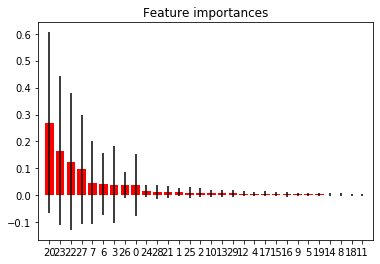

In [6]:
# Plot the feature importances of the forest
feature_importances_std = all_rf_tree_data['feature_importances_std']

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1])
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Decision Tree 0 (First) - Get output

### Check the output against the decision tree graph

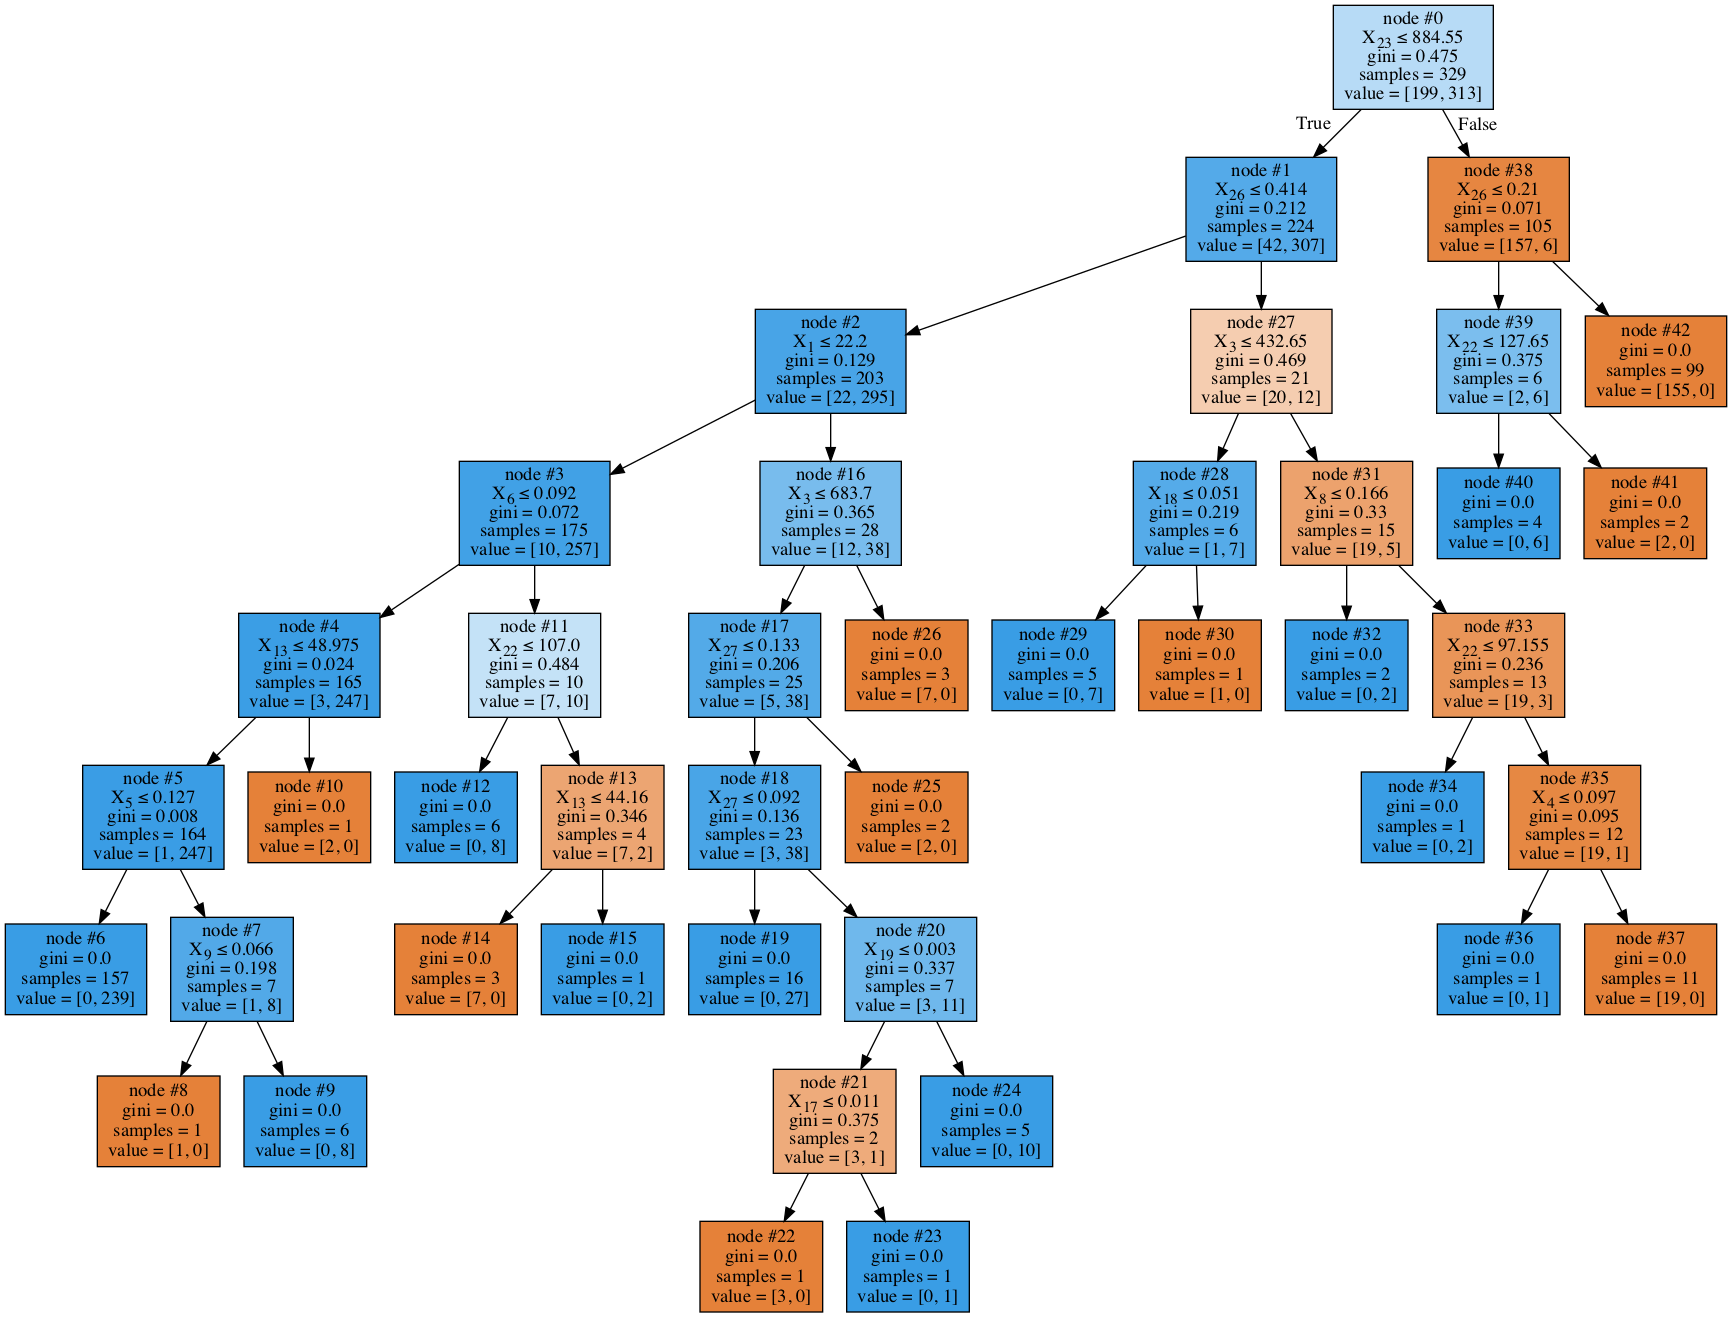

In [7]:
# Now plot the trees individually
irf_jupyter_utils.draw_tree(decision_tree = all_rf_tree_data['rf_obj'].estimators_[0])

# Run the iRF function

We will run the iRF FP-Growth with the following **parameters**

#### Data:
* breast cancer binary classification data
* **random state (for reproducibility):** 2018

#### Weighted RFs
* **K:** 5 iterations
* **number of trees:** 20

#### Bootstrap RFs
* **proportion of bootstrap samples:** 20%
* **B:** 30 bootstrap samples
* **number of trees (bootstrap RFs):** 5 iterations

#### FP-Growth (on the bootstrap RFs)
* **min_support:** 0.05 (interaction must occur 5% of the time to be returned by FP-Growth)
* **min_confidence:** 0.8 (irrelevant currently for iRF purposes but maybe useful for others)
* **bootstrap_num:** 20 (for each bootstrap sample, saves top 10 interactions and then computes stability)

# Running the iRF is easy - single function call

* All of the bootstrap, RIT complexity is covered through the key parameters passed through
in the main algorithm (as listed above)
* This function call returns the following data:
    1. all RF weights
    2. all the K RFs that are iterated over
    3. all of the B bootstrap RFs that are run
    4. all the B*M RITs that are run on the bootstrap RFs
    5. the stability score
    
### This is a lot of data returned!

Will be useful when we build the **interface** later

### Let's run it!

In [8]:
all_rf_weights, all_K_iter_rf_data, \
all_rf_bootstrap_output, all_rit_bootstrap_output, \
stability_score = irf_utils.run_iRF_FPGrowth(X_train=X_train,
                                    X_test=X_test,
                                    y_train=y_train,
                                    y_test=y_test,
                                    K=5,
                                    rf=RandomForestClassifier(n_estimators=40),
                                    B=30,
                                    random_state_classifier=2018,
                                    propn_n_samples=.2,
                                    bin_class_type=1,
                                    min_support=0.05,
                                    min_confidence=0.8,
                                    bootstrap_num=20)

In [9]:
stability_score

{'27': 1.0,
 '7': 0.9666666666666667,
 '7_27': 0.8333333333333334,
 '22': 1.0,
 '22_27': 1.0,
 '7_22': 0.9333333333333333,
 '7_22_27': 0.6666666666666666,
 '23': 0.9333333333333333,
 '23_27': 0.8666666666666667,
 '21': 0.8,
 '1': 0.5,
 '1_27': 0.23333333333333334,
 '7_23': 0.43333333333333335,
 '22_23': 0.7333333333333333,
 '21_22': 0.6333333333333333,
 '21_27': 0.4,
 '21_22_27': 0.23333333333333334,
 '22_23_27': 0.6333333333333333,
 '26': 0.4,
 '7_23_27': 0.13333333333333333,
 '7_22_23': 0.06666666666666667,
 '22_26': 0.26666666666666666,
 '20': 0.4666666666666667,
 '21_23': 0.06666666666666667,
 '20_27': 0.36666666666666664,
 '7_20': 0.03333333333333333,
 '21_23_27': 0.03333333333333333,
 '1_22': 0.36666666666666664,
 '26_27': 0.2,
 '22_26_27': 0.06666666666666667,
 '7_21': 0.16666666666666666,
 '6': 0.16666666666666666,
 '20_22': 0.26666666666666666,
 '7_21_22': 0.06666666666666667,
 '20_23': 0.1,
 '20_21': 0.03333333333333333,
 '20_22_27': 0.1,
 '1_23': 0.03333333333333333,
 '7_21_

# Examine the stability scores

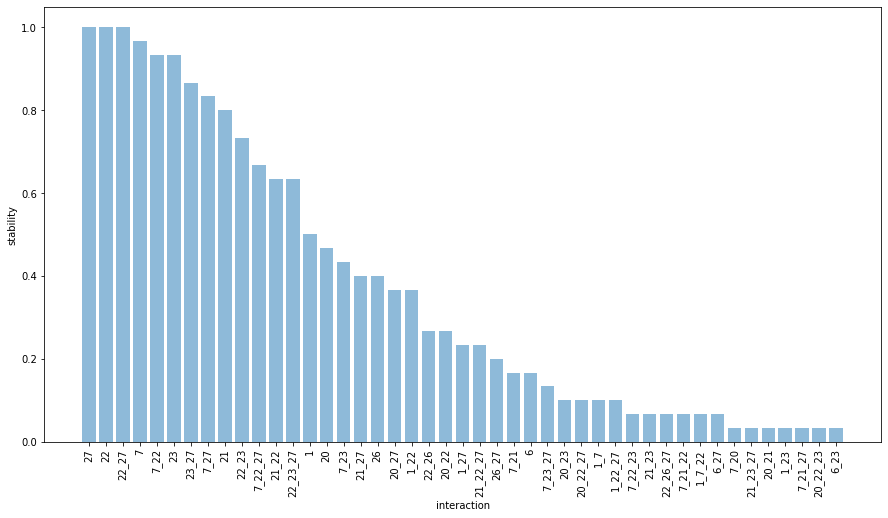

In [10]:
irf_jupyter_utils._get_histogram(stability_score, sort = True)

## Comparing Stability Scores between RIT iRF and FP-Growth iRF

In [11]:
_, _, _, _, rit_stability_score = irf_utils.run_iRF(X_train=X_train,
                                    X_test=X_test,
                                    y_train=y_train,
                                    y_test=y_test,
                                    K=5,
                                    rf=RandomForestClassifier(n_estimators=40),
                                    B=30,
                                    random_state_classifier=2018,
                                    propn_n_samples=.2,
                                    bin_class_type=1,
                                    M=20,
                                    max_depth=5,
                                    noisy_split=False,
                                    num_splits=2,
                                    signed=False)

In [12]:
def unsigned_to_output(path):
    temp = path.split("_")
    features = [int(elem) for elem in temp]
    features.sort()
    features = [str(elem) for elem in features]
    output = "_".join(features)
    return output

In [13]:
from collections import defaultdict
conversion = defaultdict(list)
rit_interactions = []
interactions = []

for inter in stability_score.keys():
    conversion[unsigned_to_output(inter)].append(inter)
    rit_interactions.append(unsigned_to_output(inter))
    
for inter in rit_stability_score.keys():
    conversion[unsigned_to_output(inter)].append(inter)
    interactions.append(unsigned_to_output(inter))

In [14]:
rit_interactions = set(rit_interactions)
interactions = set(interactions)

print("The number of RIT interactions are:")
print(len(interactions))

print("The number of FP-Growth interactions are:")
print(len(rit_interactions))

print("The number of interactions in common are:")
print(len(rit_interactions.intersection(interactions)))

The number of RIT interactions are:
66
The number of FP-Growth interactions are:
45
The number of interactions in common are:
35


It seems that both RIT and FP-Growth are returning many interactions in common, and most of the FP-Growth interactions are ones also found by RIT. However RIT iRF is returning more interactions as compared to FP-Growth, but this can easily be adjusted by changing the min_support parameter.

In [15]:
rit_sta = []
fp_sta = []
feature_paths = []

data_x = rit_stability_score.keys()
data_x = sorted(rit_stability_score, key=rit_stability_score.get,
                        reverse=True)

for inter in data_x:
    index = unsigned_to_output(inter)
    rit_sta.append(rit_stability_score[index])
    all_inter = conversion[index]
    if len(all_inter) == 1:
        fp_sta.append(0)
    else:
        index = all_inter.index(inter)
        temp = all_inter[:index] + all_inter[index+1:]
        fp_sta.append(stability_score[temp[0]])
    feature_paths.append(inter)
    
for inter in stability_score.keys():
    index = unsigned_to_output(inter)
    all_inter = conversion[index]
    if len(all_inter) == 1:
        rit_sta.append(0)
        fp_sta.append(stability_score[all_inter[0]])
        feature_paths.append(index)

<Figure size 432x288 with 0 Axes>

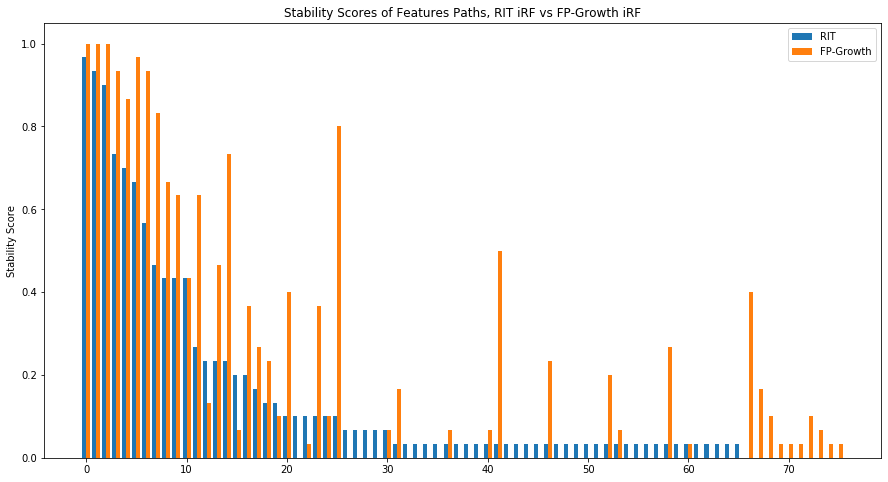

In [16]:
plt.clf()
plt.figure(figsize=(15, 8))

# code copied from stack overflow
def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    plt.bar(_X - width/2. + 0/float(n)*width, vals[0], 
            width=width/float(n), align="edge", label="RIT") 
    plt.bar(_X - width/2. + 1/float(n)*width, vals[1], 
            width=width/float(n), align="edge", label="FP-Growth")   
    #plt.xticks(_X, X)
    
subcategorybar(feature_paths, [rit_sta, fp_sta])
plt.legend()

plt.ylabel("Stability Score")
plt.title("Stability Scores of Features Paths, RIT iRF vs FP-Growth iRF")

plt.show()

For every interaction that iRF with RIT returns, its stability score is plotted in blue, and right next to it in orange is the corresponding FP-Growth stability score for the feature. A few things to point out, it seems that FP-Growth has a tendency to have higher stability scores for the interactions that the two find in common. In addition, some of the interactions that FP-Growth find but RIT doesn't (or RIT assigns low stability scores for) FP-Growth gives fairly high stability scores.

## Speed Comparison

In [17]:
import time

start = time.time()
_, _, _, _, _ = irf_utils.run_iRF(X_train=X_train,
                                    X_test=X_test,
                                    y_train=y_train,
                                    y_test=y_test,
                                    K=5,
                                    rf=RandomForestClassifier(n_estimators=40),
                                    B=30,
                                    random_state_classifier=2018,
                                    propn_n_samples=.2,
                                    bin_class_type=1,
                                    M=20,
                                    max_depth=5,
                                    noisy_split=False,
                                    num_splits=2,
                                    signed=False)
end = time.time()
RIT_time = end - start

start = time.time()
_, _, _, _, _ = irf_utils.run_iRF_FPGrowth(X_train=X_train,
                                    X_test=X_test,
                                    y_train=y_train,
                                    y_test=y_test,
                                    K=5,
                                    rf=RandomForestClassifier(n_estimators=40),
                                    B=30,
                                    random_state_classifier=2018,
                                    propn_n_samples=.2,
                                    bin_class_type=1,
                                    min_support=0.05,
                                    min_confidence=0.8,
                                    bootstrap_num=20)
end = time.time()
FPGrowth_time = end - start

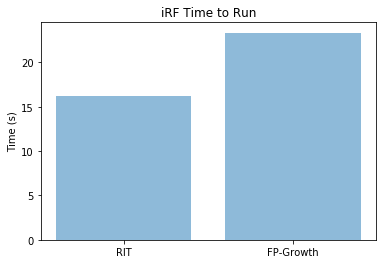

In [18]:
time = (RIT_time, FPGrowth_time)
objects = ("RIT", "FP-Growth")

plt.bar([0, 1], time, align='center', alpha=0.5)
plt.xticks([0,1], objects)
plt.ylabel('Time (s)')
plt.title('iRF Time to Run')

plt.show()

FP-Growth is about 5 seconds slower (25% slower), but most of this is likely due to overheard for intializing Spark. Would need to run on datasets increasing in size to see overall performance trend.

Potential Enhancements: Instead of getting all the interactions that have greater than some specified support, there are algorithms (TFP) based on FP-Growth that are able to return the top $k$ closed interaction sets. This would likely provide substantial speedup and would not require the user to pre-specify the required minimum support. However the issue is that there is no publicly available implementation of such algorithms.